In [1]:
! pip install --upgrade --quiet  wikipedia

In [2]:
! pip install -U langchain langchain-openai

In [3]:
! pip install langgraph langchain_community

In [1]:

import os

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"] = "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"
os.environ["LANGCHAIN_PROJECT"] = "pr-tart-safeguard-1"


In [2]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

In [3]:
wikipedia = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper())

In [4]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.graph import StateGraph, START, END


In [5]:
from langchain_groq import ChatGroq


In [6]:
import getpass
import os

os.environ["GROQ_API_KEY"] = getpass.getpass("Enter your Groq API key: ")

In [7]:
llm = ChatGroq(
    model="mixtral-8x7b-32768",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)

In [8]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [9]:
graph_builder = StateGraph(State)


In [10]:
llm_with_tools = llm.bind_tools([wikipedia])


In [11]:
def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


In [12]:
graph_builder.add_node("chatbot", chatbot)


In [13]:
tool_node = ToolNode(tools=[wikipedia])


In [14]:
graph_builder.add_node("tools", tool_node)


In [15]:
graph_builder.add_edge(START, "chatbot") 


In [16]:
graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,  
)

In [17]:
graph_builder.add_edge("tools", "chatbot")  


In [18]:
graph_builder.add_edge("chatbot", END)  


In [19]:
graph = graph_builder.compile()


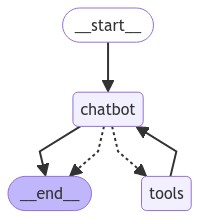

In [20]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [21]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    state = {"messages": [user_input]}
    for event in graph.stream(state):
        for value in event.values():
            print("Assistant:", value["messages"][-1])

Assistant: content='' additional_kwargs={'tool_calls': [{'id': 'call_xr49', 'function': {'arguments': '{"query":"elizabeth"}', 'name': 'wikipedia'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 89, 'prompt_tokens': 1210, 'total_tokens': 1299, 'completion_time': 0.142511063, 'prompt_time': 0.113362849, 'queue_time': 0.0008543699999999932, 'total_time': 0.255873912}, 'model_name': 'mixtral-8x7b-32768', 'system_fingerprint': 'fp_c5f20b5bb1', 'finish_reason': 'tool_calls', 'logprobs': None} id='run-ba4bdff8-b276-40cb-b5d1-47293f9a830b-0' tool_calls=[{'name': 'wikipedia', 'args': {'query': 'elizabeth'}, 'id': 'call_xr49', 'type': 'tool_call'}] usage_metadata={'input_tokens': 1210, 'output_tokens': 89, 'total_tokens': 1299}


c:\Users\musta\AppData\Local\Programs\Python\Python311\Lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file c:\Users\musta\AppData\Local\Programs\Python\Python311\Lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Assistant: content="Page: Elizabeth II\nSummary: Elizabeth II (Elizabeth Alexandra Mary; 21 April 1926 – 8 September 2022) was Queen of the United Kingdom and other Commonwealth realms from 6 February 1952 until her death in 2022. She was queen regnant of 32 sovereign states over the course of her lifetime and remained the monarch of 15 realms by the time of her death. Her reign of 70 years and 214 days is the longest of any British monarch or female monarch, and the second-longest verified reign of any monarch of a sovereign state in history.\nElizabeth was born in Mayfair, London, during the reign of her paternal grandfather, King George V. She was the first child of the Duke and Duchess of York (later King George VI and Queen Elizabeth The Queen Mother). Her father acceded to the throne in 1936 upon the abdication of his brother Edward VIII, making the ten-year-old Princess Elizabeth the heir presumptive. She was educated privately at home and began to undertake public duties during